In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import defaultdict


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataScientist.csv to DataScientist.csv


In [ ]:
df = pd.read_csv("DataScientist.csv")
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
df.drop(["Unnamed: 0","index"],axis=1,inplace=True)
df.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1
3908,Patient Safety Physician or Safety Scientist -...,$55K-$112K (Glassdoor est.),"Help us transform patients' lives.\nAt UCB, we...",3.7,UCB\n3.7,"Slough, OH","Brussel, Belgium",5001 to 10000 employees,-1,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$2 to $5 billion (USD),AbbVie,-1


In [ ]:
df.shape

(3909, 15)

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [ ]:
df['Job Title'].value_counts()

Data Scientist                                                                                                                     274
Data Engineer                                                                                                                      260
Data Analyst                                                                                                                       246
Senior Data Scientist                                                                                                               91
Machine Learning Engineer                                                                                                           47
                                                                                                                                  ... 
Video Codec Scientist                                                                                                                1
Data Scientist, Operations Data Science                

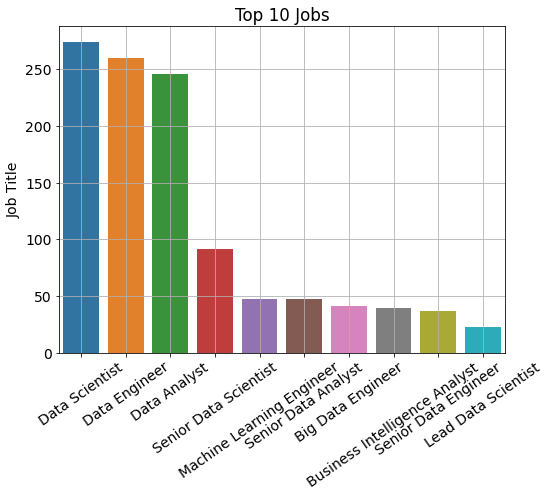

In [ ]:
# show top 10 only
plt.figure(figsize=(8, 6))
font = {'size'   : 14}
plt.rc('font', **font)
temp = df['Job Title'].value_counts()
sns.barplot(x=temp.index[0:10], y=temp[0:10])
plt.title('Top 10 Jobs')
plt.xticks(rotation=35)
plt.grid()
plt.show()

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [ ]:
df['Salary Estimate']= df['Salary Estimate'].str.replace('(', '').str.replace(')', '').str.replace('Glassdoor est.', '').str.replace('Employer est.', '')


In [ ]:
df['Salary Estimate'].value_counts()


$93K-$151K          62
$113K-$180K         61
$111K-$175K         60
$71K-$122K          60
$119K-$147K         44
                    ..
$34-$53 Per Hour     7
$99K-$173K           6
$146K-$175K          3
$10-$26 Per Hour     3
$41K-$74K            1
Name: Salary Estimate, Length: 148, dtype: int64

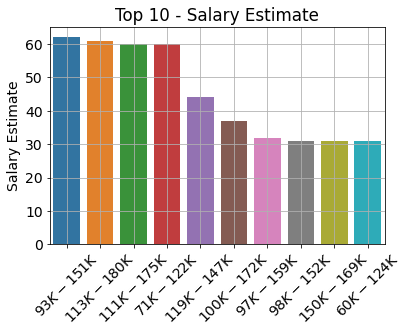

In [ ]:
temp = df['Salary Estimate'].value_counts()
sns.barplot(x=temp.index[0:10], y=temp[0:10])
plt.title('Top 10 - Salary Estimate')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
df_salary = df['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K',' ')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', ' ')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)


In [ ]:
df['Minimum Salary'] = minimum_salary
df['Maximum Salary'] = maximum_salary

df.drop('Salary Estimate',axis = 1,inplace = True)

In [ ]:
df['avg_salary'] = (df["Minimum Salary"]+df["Maximum Salary"])/2

In [ ]:
df['avg_salary']

0       146.0
1       146.0
2       146.0
3       146.0
4       146.0
        ...  
3904     83.5
3905     83.5
3906     83.5
3907     83.5
3908     83.5
Name: avg_salary, Length: 3909, dtype: float64

In [ ]:
Location = df['Location'].str.split(",",expand=True,)
Location_City = Location[0]
Location_State = Location[1]
df['Location City'] = Location_City
df['Location State'] = Location_State
df.drop('Location',axis = 1, inplace = True)

HQ = df['Headquarters'].str.split(",",expand=True)
Headquarters_City = HQ[0]
Headquarters_State = HQ[1]
df['Headquarters City'] = Headquarters_City
df['Headquarters State'] = Headquarters_State
df.drop('Headquarters',axis = 1, inplace = True)

In [ ]:
df['Type of ownership'].value_counts()


Company - Private                 1933
Company - Public                  1114
-1                                 229
Nonprofit Organization             207
Subsidiary or Business Segment     160
Government                          91
College / University                77
Unknown                             38
Contract                            17
Hospital                            16
Private Practice / Firm             12
Other Organization                   5
School / School District             5
Self-employed                        4
Franchise                            1
Name: Type of ownership, dtype: int64

In [ ]:
df['Industry'].value_counts()

-1                                  546
IT Services                         472
Staffing & Outsourcing              313
Biotech & Pharmaceuticals           293
Computer Hardware & Software        264
                                   ... 
Metals Brokers                        1
Shipping                              1
Telecommunications Manufacturing      1
Truck Rental & Leasing                1
Auto Repair & Maintenance             1
Name: Industry, Length: 96, dtype: int64

In [ ]:
df['Sector'].value_counts()

Information Technology                1124
Business Services                      679
-1                                     546
Biotech & Pharmaceuticals              293
Finance                                270
Health Care                            197
Insurance                              109
Education                              101
Manufacturing                           87
Government                              82
Media                                   75
Retail                                  72
Accounting & Legal                      71
Aerospace & Defense                     37
Oil, Gas, Energy & Utilities            34
Telecommunications                      21
Consumer Services                       20
Non-Profit                              18
Construction, Repair & Maintenance      16
Transportation & Logistics              16
Real Estate                             12
Arts, Entertainment & Recreation        10
Restaurants, Bars & Food Services        9
Agriculture

In [ ]:
df['Revenue'] = df['Revenue'].replace('Unknown/Non-Applicable', None)
df['Revenue'] = df['Revenue'].str.replace('$', ' ').str.replace('(USD)', ' ').str.replace('(', ' ').str.replace(')', ' ').str.replace(' ', '')
df['Revenue'].value_counts()

Unknown/Non-Applicable    1163
10+billion                 599
100to500million            338
-1                         229
50to100million             214
2to5billion                211
10to25million              191
1to2billion                180
1to5million                170
25to50million              143
5to10billion               133
Lessthan1million           124
500millionto1billion       114
5to10million               100
Name: Revenue, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           3909 non-null   object 
 1   Job Description     3909 non-null   object 
 2   Rating              3909 non-null   float64
 3   Company Name        3909 non-null   object 
 4   Size                3909 non-null   object 
 5   Founded             3909 non-null   int64  
 6   Type of ownership   3909 non-null   object 
 7   Industry            3909 non-null   object 
 8   Sector              3909 non-null   object 
 9   Revenue             3909 non-null   object 
 10  Competitors         3909 non-null   object 
 11  Easy Apply          3909 non-null   object 
 12  Minimum Salary      3909 non-null   int64  
 13  Maximum Salary      3909 non-null   int64  
 14  avg_salary          3909 non-null   float64
 15  Location City       3909 non-null   object 
 16  Locati

In [ ]:
df

,Job Title,Job Description,Rating,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Minimum Salary,Maximum Salary,avg_salary,Location City,Location State,Headquarters City,Headquarters State
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown/Non-Applicable,-1,-1,111,181,146.0,New York,NY,Montreal,Canada
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown/Non-Applicable,-1,-1,111,181,146.0,New York,NY,New York,NY
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,1 to 50 employees,-1,Unknown,-1,-1,Unknown/Non-Applicable,-1,True,111,181,146.0,New York,NY,New York,NY
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown/Non-Applicable,"Zocdoc, Healthgrades",-1,111,181,146.0,Lyndhurst,NJ,Lyndhurst,NJ
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown/Non-Applicable,"BBDO, Grey Group, Droga5",-1,111,181,146.0,New York,NY,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,201 to 500 employees,2011,Company - Private,IT Services,Information Technology,10to25million,-1,-1,55,112,83.5,Dublin,OH,Irving,TX
3905,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,50to100million,-1,-1,55,112,83.5,Columbus,OH,Woodridge,IL
3906,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,100to500million,-1,-1,55,112,83.5,Dublin,OH,Irving,TX
3907,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Lessthan1million,-1,-1,55,112,83.5,Dublin,OH,Omaha,NE


In [ ]:
df['Location City'].value_counts()

Austin                   345
Chicago                  330
San Diego                304
New York                 303
Houston                  219
                        ... 
West University Place      1
Allegheny West             1
Bellaire                   1
West Menlo Park            1
Hilliard                   1
Name: Location City, Length: 185, dtype: int64

In [ ]:
data = df.groupby('Location City')[['Minimum Salary', 'Maximum Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False).head(25)
data


,Minimum Salary,Maximum Salary
Location City,,
Queens Village,156.000000,254.000000
Rockville Centre,156.000000,254.000000
Stanford,150.000000,237.000000
Franklin Lakes,129.000000,210.000000
Port Washington,129.000000,210.000000
Duarte,132.000000,208.000000
Sherman Oaks,132.000000,208.000000
Livermore,137.500000,202.750000
Redwood City,138.750000,200.687500


In [ ]:
data1 = df.groupby('Job Title')[['Minimum Salary', 'Maximum Salary']].mean().sort_values(['Maximum Salary','Minimum Salary'],ascending=False).head(25)
data1


,Minimum Salary,Maximum Salary
Job Title,,
"Data Analyst, Bitcoin Trading Firm",156.0,254.0
Data Science Analyst/Engineer,156.0,254.0
"Data Scientist, Voter Data",156.0,254.0
Deployed Data Scientist,156.0,254.0
NLP Machine Learning Engineer,156.0,254.0
"Senior / Data Scientist, Advertising Business",156.0,254.0
"VP, Data Scientist",156.0,254.0
"AI/ML - Machine Learning Engineer, Advanced Development",200.0,250.0
"Community Data Manager, Single-Cell Biology",200.0,250.0


In [ ]:
data2 = pd.DataFrame(df['Sector'].value_counts())
data2

,Sector
Information Technology,1124
Business Services,679
-1,546
Biotech & Pharmaceuticals,293
Finance,270
Health Care,197
Insurance,109
Education,101
Manufacturing,87
Government,82


In [ ]:
import plotly.express as px
fig = px.pie(data2, values=data2['Sector'], names=data2.index)
fig.update_layout(title = 'Percentage of Different Sectors with requirement of Data Scientist  Roles')
fig.show()

In [ ]:
data3 = pd.DataFrame(df['Headquarters City'].value_counts().head(25))
data3

fig = px.pie(data3, values=data3['Headquarters City'], names=data3.index)
fig.update_layout(title = 'Top 25 Headquarter City')
fig.show()

In [ ]:
fig = px.choropleth(locations= ['AZ','NJ','NY','CO','IL','NC','VA','SC','WA','PA','DE','TX','KS','FL','IN','OH','GA','UT'], 
                    locationmode="USA-states", 
                    color=[94.494845, 90.232558, 89.026087, 89.022727, 88.829268,85.233333, 85.125000, 83.000000, 82.759259, 77.824561, 75.909091, 74.116751, 67.000000, 66.666667, 61.000000, 58.800000, 56.000000, 48.454545],
                    labels={'color':'Maximum Salary', 'locations':'State'},
                    scope="usa") 


fig.update_layout(
    
    title_text = 'Top 20 States with Maximum Salary',
    geo_scope='usa'
)
fig.show()

In [ ]:
pg_lan = ["python","c++","java","matlab",".net","c#","javascript","html","bash"]
big_data = ["big data","hadoop","spark","impala","cassandra","kafka","hdfs","hbase","hive"]
exp_edu = ["experience","bs","ms","phd","full-time","intern","remote","master","doctorate","computer science","bachelor"]
cloud = ["aws","gcp","azure","s3","redshift","ec2","lambda","route s3","dynamo db"]
ds_ml = ["time series","machine learning","regression","stat","numpy","pandas","data visualization","data analysis","time series","data cleaning","deep learning"]
other_skills = ["sql","mongo db","excel","sas","nosql","communication"]
job = df["Job Description"].tolist()

In [ ]:
job = [x.lower() for x in job]

In [ ]:
pg_lan_required = defaultdict()
for item in pg_lan:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    pg_lan_required[item] = counter

pg_lan_df = pd.DataFrame(list(pg_lan_required.items()),columns = ['Programming Langauge','count']) 
pg_lan_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

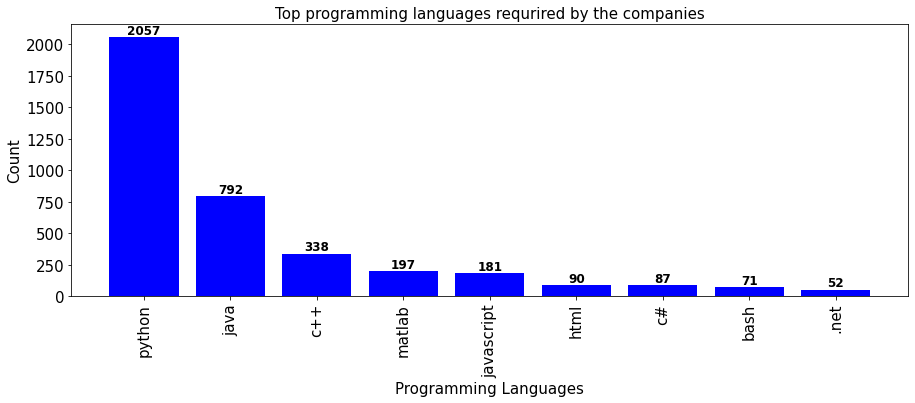

In [ ]:
plt.figure(figsize = (15,5))
x = pg_lan_df["Programming Langauge"]
y = pg_lan_df["count"]
plt.bar(x,y,color= "blue")
plt.title("Top programming languages requrired by the companies",fontsize=15)
plt.xlabel("Programming Languages",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in pg_lan_required.items():
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');


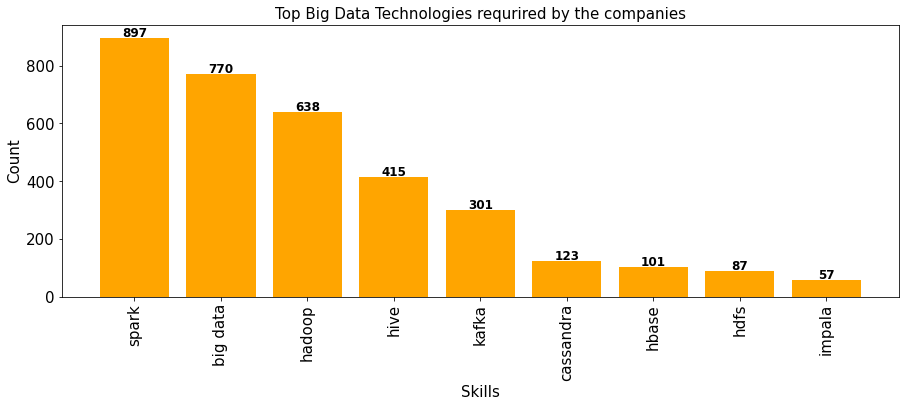

In [ ]:
counter = 0
big_data_required = defaultdict()
for item in big_data:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    big_data_required[item] = counter

big_data_df = pd.DataFrame(list(big_data_required.items()),columns = ['Big Data Technologies','count']) 
big_data_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
x = big_data_df["Big Data Technologies"]
y = big_data_df["count"]
plt.bar(x,y,color= "orange")
plt.title("Top Big Data Technologies requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in big_data_required.items():
    plt.text(k,v+5, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');


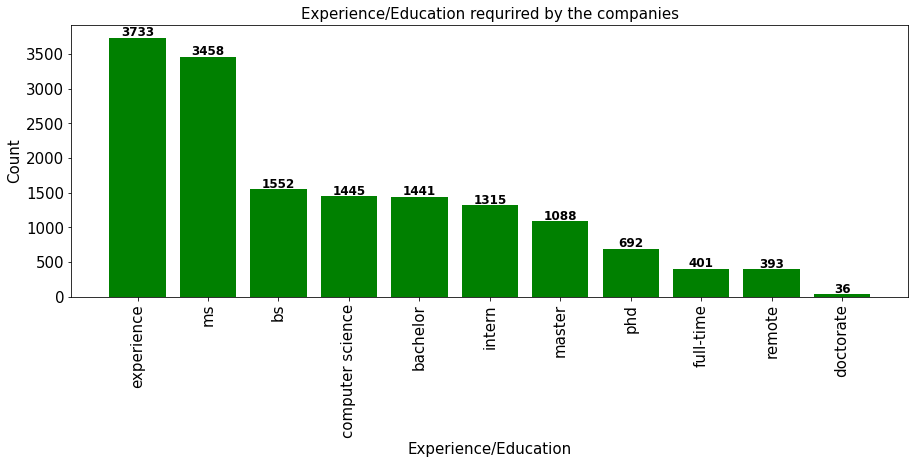

In [ ]:
exp_edu_required = defaultdict()
for item in exp_edu:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    exp_edu_required[item] = counter
    
exp_edu_df = pd.DataFrame(list(exp_edu_required.items()),columns = ['Experience/Education','count']) 
exp_edu_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
x = exp_edu_df["Experience/Education"]
y = exp_edu_df["count"]
plt.bar(x,y,color= "green")
plt.title("Experience/Education requrired by the companies",fontsize=15)
plt.xlabel("Experience/Education",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in exp_edu_required.items():
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');


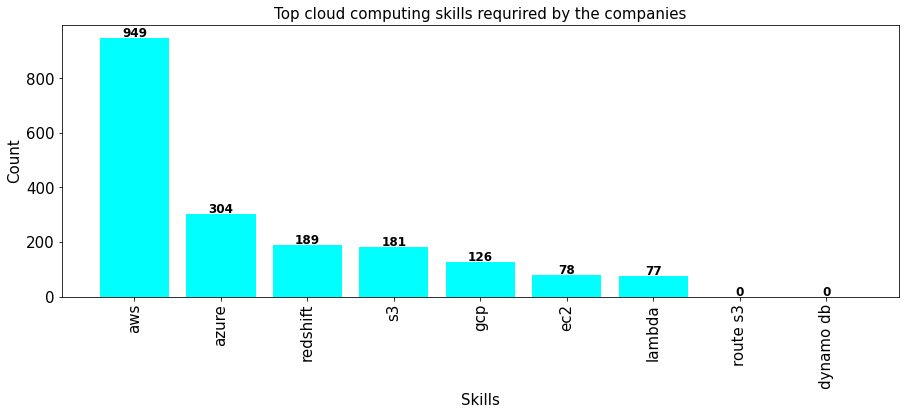

In [ ]:
counter = 0
cloud_required = defaultdict()
for item in cloud:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    cloud_required[item] = counter



cloud_df = pd.DataFrame(list(cloud_required.items()),columns = ['cloud ','count']) 
cloud_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
x = cloud_df["cloud "]
y = cloud_df["count"]
plt.bar(x,y,color= "cyan")
plt.title("Top cloud computing skills requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in cloud_required.items():
    plt.text(k,v+5, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');


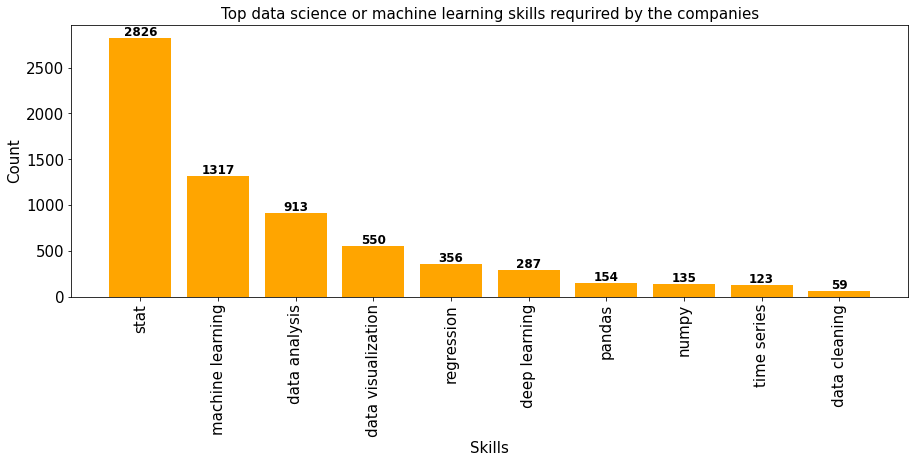

In [ ]:
counter = 0
ds_ml_required = defaultdict()
for item in ds_ml:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    ds_ml_required[item] = counter

ds_ml_df = pd.DataFrame(list(ds_ml_required.items()),columns = ['Data Science/Machine Learning Skills ','count']) 
ds_ml_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
x = ds_ml_df["Data Science/Machine Learning Skills "]
y = ds_ml_df["count"]
plt.bar(x,y,color= "orange")
plt.title("Top data science or machine learning skills requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in ds_ml_required.items(): 
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');



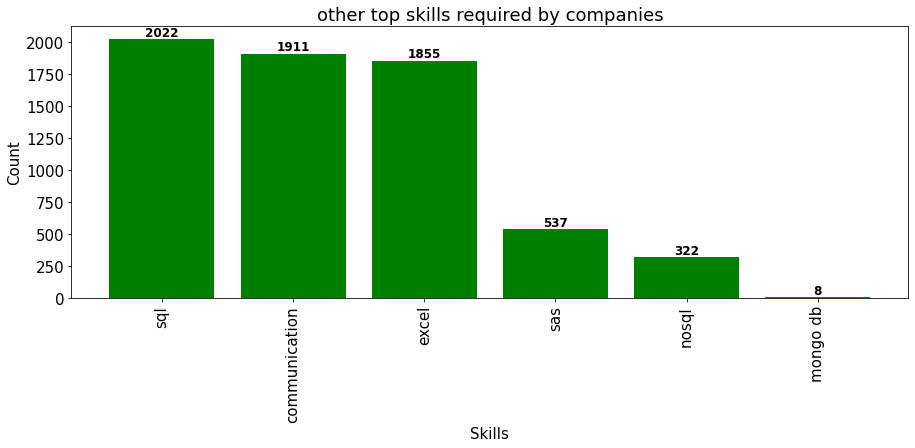

In [ ]:

counter = 0
other_skills_required = defaultdict()
for item in other_skills:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    other_skills_required[item] = counter


other_skills_df = pd.DataFrame(list(other_skills_required.items()),columns = ['Other Skills ','count']) 
other_skills_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
plt.title("other top skills required by companies", fontsize=18)
plt.bar(other_skills_df["Other Skills "], other_skills_df["count"],color= "Green")
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in other_skills_required.items(): 
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');


In [ ]:
df['Size'] = df['Size'].str.replace('employees', '')
df['Size'] = df['Size'].str.replace('+', 'plus')
df['Size'] = df['Size'].replace('Unknown', None)
df['Size'] = df['Size'].str.replace('10000plus', '10000 to 10001')
size = df['Size'].str.split("to",expand=True)
df['Minimum Size'] = size[0]
df['Maximum Size'] = size[1]
df.drop('Size',1,inplace = True)
df


,Job Title,Job Description,Rating,Company Name,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Minimum Salary,Maximum Salary,avg_salary,Location City,Location State,Headquarters City,Headquarters State,Minimum Size,Maximum Size
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown/Non-Applicable,-1,-1,111,181,146.0,New York,NY,Montreal,Canada,501,1000
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown/Non-Applicable,-1,-1,111,181,146.0,New York,NY,New York,NY,1001,5000
2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,-1,Unknown,-1,-1,Unknown/Non-Applicable,-1,True,111,181,146.0,New York,NY,New York,NY,1,50
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,2019,Company - Private,Internet,Information Technology,Unknown/Non-Applicable,"Zocdoc, Healthgrades",-1,111,181,146.0,Lyndhurst,NJ,Lyndhurst,NJ,201,500
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,2007,Company - Private,Advertising & Marketing,Business Services,Unknown/Non-Applicable,"BBDO, Grey Group, Droga5",-1,111,181,146.0,New York,NY,New York,NY,51,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,2011,Company - Private,IT Services,Information Technology,10to25million,-1,-1,55,112,83.5,Dublin,OH,Irving,TX,201,500
3905,Data Analyst â Junior,"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0",2008,Company - Private,IT Services,Information Technology,50to100million,-1,-1,55,112,83.5,Columbus,OH,Woodridge,IL,51,200
3906,Security Analytics Data Engineer,Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8",1977,Company - Private,Staffing & Outsourcing,Business Services,100to500million,-1,-1,55,112,83.5,Dublin,OH,Irving,TX,5001,10000
3907,Security Analytics Data Engineer,The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,-1,Company - Private,Accounting,Accounting & Legal,Lessthan1million,-1,-1,55,112,83.5,Dublin,OH,Omaha,NE,1,50


In [ ]:
def title(title):
    if 'scientist' in title.lower():
        return 'data scientist'
    elif 'engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'VP' in title.lower():
        return 'director'
    else:
        return 'na'
    

df['job'] = df['Job Title'].apply(title)

In [ ]:
dataX = df[["job",'Rating',"Founded","Industry","Location State","avg_salary","Minimum Size","Maximum Size"]]


In [ ]:
df.job.value_counts()


data scientist      1757
data engineer        897
analyst              865
na                   277
manager               80
director              26
machine learning       7
Name: job, dtype: int64

In [ ]:
pd.pivot_table(df, index = 'job', values = 'avg_salary')

,avg_salary
job,
analyst,100.885549
data engineer,103.039019
data scientist,115.143711
director,99.980769
machine learning,109.000000
manager,108.931250
na,99.561372


In [ ]:
pd.pivot_table(df, index = ['Location State','job'], values = 'avg_salary').sort_values('Location State', ascending = False)

avg_salary
Location State  job                         
 United Kingdom data scientist     69.500000
                analyst           190.000000
 TX             na                 94.324074
                manager           107.060000
                machine learning   86.000000
...                                      ...
 AZ             director          116.000000
                data engineer      95.023585
                manager            83.833333
                na                 96.839286
                analyst            93.650685

[62 rows x 1 columns]

In [ ]:
dataX.shape


(3909, 8)

In [ ]:
dataX = dataX.replace(-1, np.nan)


In [ ]:
dataX.head()


,job,Rating,Founded,Industry,Location State,avg_salary,Minimum Size,Maximum Size
0,data scientist,3.5,2007.0,Travel Agencies,NY,146.0,501,1000
1,data scientist,4.5,2008.0,"Health, Beauty, & Fitness",NY,146.0,1001,5000
2,manager,NaN,NaN,-1,NY,146.0,1,50
3,analyst,3.4,2019.0,Internet,NJ,146.0,201,500
4,director,3.4,2007.0,Advertising & Marketing,NY,146.0,51,200


In [ ]:
dataX = dataX.replace("-1", np.nan)
dataX.head()

,job,Rating,Founded,Industry,Location State,avg_salary,Minimum Size,Maximum Size
0,data scientist,3.5,2007.0,Travel Agencies,NY,146.0,501,1000
1,data scientist,4.5,2008.0,"Health, Beauty, & Fitness",NY,146.0,1001,5000
2,manager,NaN,NaN,NaN,NY,146.0,1,50
3,analyst,3.4,2019.0,Internet,NJ,146.0,201,500
4,director,3.4,2007.0,Advertising & Marketing,NY,146.0,51,200


In [ ]:
dataX = dataX.replace("na", np.nan)
dataX['job'].dropna()
dataX['Rating'].dropna()
dataX['Founded'].dropna()
dataX['Industry'].dropna()
dataX['Location State'].dropna()
dataX['avg_salary'].dropna()
dataX['Maximum Size'].dropna()
dataX['Minimum Size'].dropna()
data_new = dataX.dropna()
data_new


,job,Rating,Founded,Industry,Location State,avg_salary,Minimum Size,Maximum Size
0,data scientist,3.5,2007.0,Travel Agencies,NY,146.0,501,1000
1,data scientist,4.5,2008.0,"Health, Beauty, & Fitness",NY,146.0,1001,5000
3,analyst,3.4,2019.0,Internet,NJ,146.0,201,500
4,director,3.4,2007.0,Advertising & Marketing,NY,146.0,51,200
5,data scientist,2.9,1985.0,Insurance Carriers,NY,146.0,201,500
...,...,...,...,...,...,...,...,...
3901,data engineer,4.6,1991.0,IT Services,OH,83.5,201,500
3903,data engineer,3.9,2010.0,IT Services,OH,83.5,201,500
3904,data engineer,4.4,2011.0,IT Services,OH,83.5,201,500
3905,analyst,5.0,2008.0,IT Services,OH,83.5,51,200


In [131]:
df1 = pd.read_csv('eda_data.csv')

In [135]:
df1.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [136]:
df_model = df1[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]
df_dum = pd.get_dummies(df_model)

In [137]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error

model=LinearRegression()   #build linear regression model
model.fit(X_train,y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance

print("R squared", metrics.r2_score(y_test,predicted))


R squared 0.5784273460224185


In [159]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.257798079999773

In [172]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

cross_val_score(rf,X_train,y_train,scoring = 'r2', cv= 3)

array([0.52466222, 0.64285077, 0.74662122])

In [183]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add ( Dense(320, input_shape=(None,X_train.shape[1])))
model.add(Dense(320, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(1))

model.compile(metrics=["mae","mse"], optimizer="adam", loss="mse")

model.fit(X_train, y_train, epochs=3000)



Epoch 1/3000
19/19 [==============================] - 1s 12ms/step - loss: 4378.8701 - mae: 50.5666 - mse: 4378.8701
Epoch 2/3000
19/19 [==============================] - 0s 12ms/step - loss: 2826.1846 - mae: 41.3499 - mse: 2826.1846
Epoch 3/3000
19/19 [==============================] - 0s 12ms/step - loss: 2798.5276 - mae: 41.3687 - mse: 2798.5276
Epoch 4/3000
19/19 [==============================] - 0s 11ms/step - loss: 2702.5178 - mae: 40.3885 - mse: 2702.5178
Epoch 5/3000
19/19 [==============================] - 0s 11ms/step - loss: 2604.4221 - mae: 39.6973 - mse: 2604.4221
Epoch 6/3000
19/19 [==============================] - 0s 12ms/step - loss: 2663.1797 - mae: 40.1433 - mse: 2663.1797
Epoch 7/3000
19/19 [==============================] - 0s 12ms/step - loss: 2813.4099 - mae: 41.0515 - mse: 2813.4099
Epoch 8/3000
19/19 [==============================] - 0s 12ms/step - loss: 2693.8633 - mae: 40.3219 - mse: 2693.8633
Epoch 9/3000
19/19 [==============================] - 0s 12ms/st

KeyboardInterrupt: ignored